# K-Nearest Neighbours

K-Nearest Neigbours (KNN) can be used for both classification and regression problems. However, it is more widely used in classification problems in the ML industry. K-nearest neighbours is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its _k_ neighbours. The case assigned to the class is the most common amongst its K-nearest neighbours, measured by a distance function. It is fundamentally different to teh otehr models we have looked at until now.

1. Choose the number of _k_ and a distance metric
2. Find the _k_ nearest neighbours of the sample that we want to classify
3. Assign the class label by majority vote

These distance functions can be Euclidean, Manhattan, Minkowski, or Hamming distance. The first three functions are used for continuous functions and Hamming is used for categorical variables. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

At times, choosing K turns out to be a challenge while performing KNN modeling. It is key to finding a goog balance between under and over fitting. The Minlowski distance function is a generalised version of the Euclidean and Manhattan distances, and becomes the Euclidena in SciKit-lLearn if we set p=2 or Manhattan if we set p=1.

KNN is an example of a _lazy learner_. It is called lazy because it doesnt learn to discriminate the training data through a function. It is an _instance beased learning_ model that memorises the training dataset. As new training data is collected teh classifier imediately adapts to it. However the computational complexity for classifiying new samples grows linearly with the number of samples in the training set. As no training setp is involved we cant discard training samples and so stporage space can be a challenge!

KNN can easily be mapped to our real lives. If you want to learn about a person about whom you have no information, you might like to find out about their close friends and the circles they move in to gain access to their information!

Things to consider before selecting KNN:
* KNN is computationally expensive.
* Variables should be normalized, or else higher-range variables can bias it.
* Works on the pre-processing stage more before going for KNN, like outlier/noise removal.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import scikit_utilities as ut

### Data

In [3]:
X_train_std, y_train, X_test_std, y_test, X_combined_std, y_combined, X_train, X_test = ut.get_iris_data()

[0 1 2]
Training Data set is 105 values long


### Model

In [4]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Plot

In [5]:
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((y_train, y_test))

In [7]:
plt=ut.plot_decision_regions(X_combined_std, Y_combined, classifier=knn, test_idx=range(105,150))

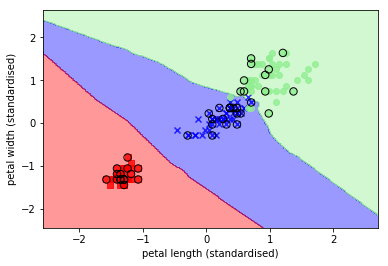

In [8]:
plt.xlabel('petal length (standardised)')
plt.ylabel('petal width (standardised)')
plt.show()

### The Curse of Dimensionality

As the dimension of a fixed size data set increases the feature space becomes increasingly sparse and the closest neighbour can be too far away to yield a good estimate. Dimensionality reduction becomes important for models like KNN.